### Introducción del Proyecto

Zuber es una nueva empresa de viajes compartidos en Chicago, y el objetivo del análisis de datos es comprender los patrones de los pasajeros y el impacto de factores externos, como el clima, en la demanda de viajes. A través del análisis de información sobre competidores y condiciones meteorológicas, se evaluará cómo los días lluviosos afectan la duración y frecuencia de los viajes. Este proyecto tiene como fin proporcionar a Zuber insights clave para optimizar su estrategia, mejorando tanto la experiencia del usuario como la eficiencia operativa en un mercado altamente competitivo.

### Desarrollo del Proyecto
#### Paso 1
En el primer paso del proyecto, se solicitó el análisis de datos meteorológicos en Chicago durante noviembre de 2017, específicamente desde un archivo HTML que contiene información sobre las condiciones climáticas. Para completar esta tarea, se utilizó un enfoque de web scraping con las bibliotecas requests y BeautifulSoup en Python para extraer los datos de la página web. El proceso comienza con la descarga de la página utilizando la URL proporcionada, luego se empleó BeautifulSoup para parsear el contenido HTML y localizar la tabla con la información relevante (Dataframe weather_records).

Este conjunto de datos se puede utilizar para correlacionar las condiciones climáticas con otros factores de interés, como la demanda de viajes de Zuber en Chicago, y es un paso crucial para probar la hipótesis sobre el impacto del clima en la duración y frecuencia de los viajes.

#### Paso 2: Análisis exploratorio de datos (Consultas SQL)
Se realizaron varios análisis clave para entender mejor la información sobre los viajes en taxi en Chicago durante noviembre de 2017. El primero análisis se centró en encontrar el número total de viajes realizados por cada empresa de taxis entre el 15 y 16 de noviembre de 2017. Los resultados mostraron que las empresas más populares en ese período fueron Flash Cab con 19.558 viajes y Taxi Affiliation Services con 11.422 viajes, seguidas por otras compañías como Medallion Leasing y Yellow Cab. Estos datos se agruparon y ordenaron en función de la cantidad de viajes (trips_amount), proporcionando una visión clara de qué compañías dominaban el mercado durante ese período específico.

A continuación, se realizó un análisis para identificar las empresas de taxis cuyos nombres contenían las palabras "Yellow" o "Blue" entre el 1 y el 7 de noviembre de 2017. Este análisis agrupó los resultados por company_name y calculó el total de viajes (trips_amount) para cada empresa. Las empresas más destacadas en este grupo fueron Blue Diamond y Yellow Cab, con un total significativo de 33.668 y 29.213 viajes respectivamente.

El último análisis exploratorio del paso 2 consistió en agrupar los viajes de Flash Cab y Taxi Affiliation Services en su propia categoría, mientras que todos los demás viajes se agruparon bajo el grupo "Other". Al hacer esto, se obtuvo un total de 335.771 viajes en la categoría "Other", con Flash Cab y Taxi Affiliation Services como las empresas con el mayor número de viajes individuales. Este análisis es clave para entender las dos compañías más competitivas en el mercado de taxis durante noviembre de 2017.

#### Paso 3 
Esta etapa consistió en probar la hipótesis de que la duración de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia durante los sábados lluviosos. Para ello, se recuperaron los identificadores de los barrios de O'Hare y Loop, y se segmentaron las horas del día en dos grupos: "Bad" (si las condiciones climáticas eran lluviosas o tormentosas) y "Good" (para el resto de las condiciones). Se obtuvo un conjunto de datos que relaciona cada hora con su condición climática, lo que permitió vincular estas condiciones con la duración de los viajes de los sábados.

Finalmente, se filtraron los viajes que comenzaron en el Loop y finalizaron en O'Hare durante los sábados. Para estos viajes, se recuperaron tanto las condiciones climáticas específicas de cada hora como la duración de cada viaje, lo que será fundamental para la prueba de hipótesis posterior.



#### Paso 4: Análisis exploratorio de datos (Python)

En este paso se trabajó con dos conjuntos de datos adicionales. Los primeros contienen información sobre el número de viajes realizados por cada empresa de taxis durante el 15 y 16 de noviembre de 2017, mientras que el segundo conjunto proporciona los barrios de Chicago donde finalizaron los viajes y el promedio de viajes que terminaron en cada uno de esos barrios durante noviembre de 2017.

In [1]:
#carga de librerías
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

El primer paso fue importar ambos archivos y verificar la estructura de los datos. Se utilizó pandas para cargar los CSV y examinar las primeras filas de cada conjunto, asegurando que los tipos de datos fueran correctos. En particular, en el dataset de barrios (dropoffs), se identificó que el campo average_trips, que originalmente estaba como tipo flotante, debía ser convertido a entero (int) para facilitar su análisis posterior. 

In [2]:
company_trips = pd.read_csv("/datasets/project_sql_result_01.csv")
dropoffs = pd.read_csv("/datasets/project_sql_result_04.csv")
weather_records = pd.read_csv("/datasets/project_sql_result_07.csv")

In [3]:
# se utilizan las funciones info y head para inspección de la información  de los datasets
print(company_trips.info())  
print(company_trips.head(4))
print()
print(dropoffs.info())  
print(dropoffs.head(4))
print()

# se cambia el tipo de dato de average_trips a entero
dropoffs['average_trips'] = dropoffs['average_trips'].astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None
                company_name  trips_amount
0                  Flash Cab         19558
1  Taxi Affiliation Services         11422
2          Medallion Leasing         10367
3                 Yellow Cab          9888

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           Ri

In [4]:
#revisión de filas duplicadas
print(company_trips.duplicated().sum())
#revisión valores ausentes 
print(company_trips.isna().sum())

#revisión de filas duplicadas
print(dropoffs.duplicated().sum())
#revisión valores ausentes 
print(dropoffs.isna().sum())

#revisión de filas duplicadas
print(weather_records.duplicated().sum())
#revisión valores ausentes 
print(weather_records.isna().sum())



0
company_name    0
trips_amount    0
dtype: int64
0
dropoff_location_name    0
average_trips            0
dtype: int64
197
start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64


Una vez realizado el ajuste, se procedió a identificar las 10 principales empresas de taxis según el número de viajes. Para ello, se ordenó el dataset company_trips por el campo trips_amount en orden descendente, y se extrajeron las 10 empresas con mayor cantidad de viajes. El gráfico resultante, mostró claramente las empresas más activas, siendo Flash Cab y Taxi Affiliation Services las líderes en número de viajes durante esos dos días:

In [5]:
top_10_company = company_trips.sort_values(by='trips_amount', ascending=False).head(10)
print(top_10_company)

                        company_name  trips_amount
0                          Flash Cab         19558
1          Taxi Affiliation Services         11422
2                  Medallion Leasing         10367
3                         Yellow Cab          9888
4    Taxi Affiliation Service Yellow          9299
5          Chicago Carriage Cab Corp          9181
6                       City Service          8448
7                           Sun Taxi          7701
8          Star North Management LLC          7455
9  Blue Ribbon Taxi Association Inc.          5953


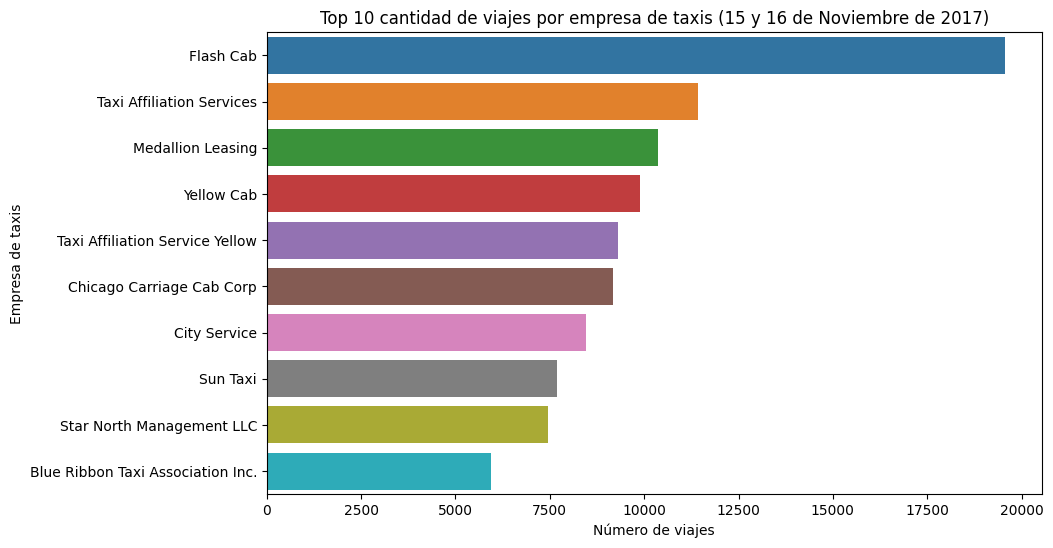

In [6]:
plt.figure(figsize=(10, 6))
sns.barplot(x='trips_amount', y='company_name', data=top_10_company)
plt.title('Top 10 cantidad de viajes por empresa de taxis (15 y 16 de Noviembre de 2017)')
plt.xlabel('Número de viajes')
plt.ylabel('Empresa de taxis')
plt.show()

El siguiente análisis se centró en los barrios de Chicago donde finalizaron los viajes. Se ordenaron los barrios en función del promedio de viajes (average_trips), y se seleccionaron los 10 barrios con el mayor número de finalizaciones. Entre los barrios más destacados se encontraron Loop, River North y Streeterville, los cuales concentraron una gran parte de los viajes terminados en noviembre de 2017.

In [7]:
top_10_dropoffs = dropoffs.sort_values(by='average_trips', ascending=False).head(10)
print(top_10_dropoffs)

  dropoff_location_name  average_trips
0                  Loop          10727
1           River North           9523
2         Streeterville           6664
3             West Loop           5163
4                O'Hare           2546
5             Lake View           2420
6            Grant Park           2068
7         Museum Campus           1510
8            Gold Coast           1364
9    Sheffield & DePaul           1259


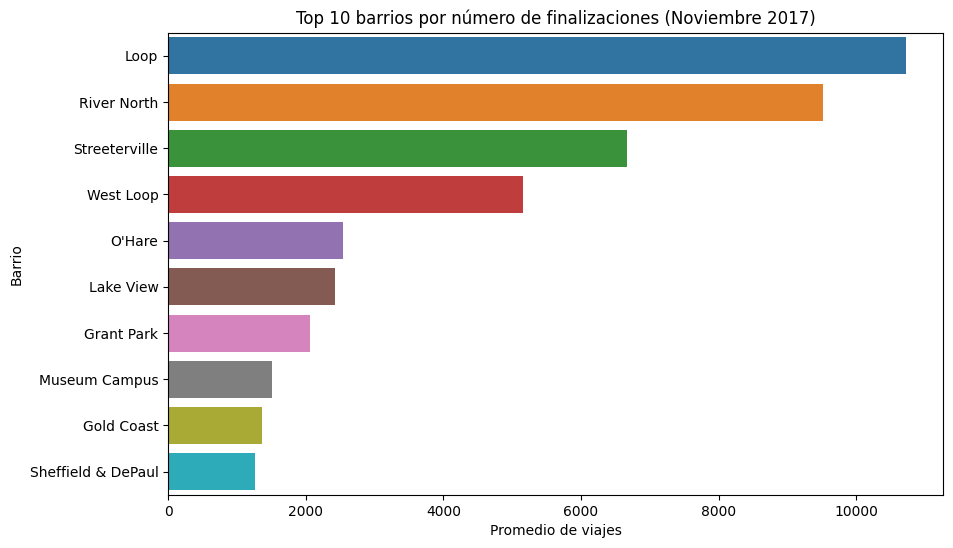

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(x='average_trips', y='dropoff_location_name', data=top_10_dropoffs)
plt.title('Top 10 barrios por número de finalizaciones (Noviembre 2017)')
plt.xlabel('Promedio de viajes')
plt.ylabel('Barrio')
plt.show()

Estos análisis proporcionan una visión integral tanto de las empresas de taxis más populares como de las áreas geográficas con mayor actividad en términos de finalizaciones de viajes. Los gráficos resultantes facilitan la interpretación visual de los datos y ayudan a identificar patrones clave que pueden ser utilizados para mejorar la estrategia operativa y de marketing de Zuber, como la asignación de recursos o la planificación de campañas dirigidas a barrios específicos.

#### Paso 5. Prueba de hipótesis (Python)

Se realizó un análisis para probar la hipótesis de que "La duración promedio de los viajes desde Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos". El primer paso fue realizar una inspección inicial de los datos para comprender su estructura y tipo. Se encontró que la columna start_ts debía ser convertida a tipo datetime para poder filtrar los viajes realizados los sábados, ademas se convierte la columna duration_seconds de float a entero ya que representa segundos. 
Luego, se creó una nueva columna is_saturday para identificar los viajes que ocurrieron en sábados y una columna is_bad_weather para clasificar los viajes según las condiciones climáticas (si la descripción contenía "Bad", se consideró mal tiempo). Con estas dos nuevas columnas, se filtraron los datos en dos grupos: uno para los sábados lluviosos y otro para los días no lluviosos o los sábados con buen clima.

In [9]:
weather_records.info()
print()
print(weather_records.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB

              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0


In [10]:
#se cambia el tipo de dato de start_ts a datetime y de duration_seconds a entero
weather_records['start_ts'] = pd.to_datetime(weather_records['start_ts'])
weather_records['duration_seconds'] = weather_records['duration_seconds'].astype(int)

#filtrar los sábados (weekday = 5)
weather_records['is_saturday'] = weather_records['start_ts'].dt.weekday == 5  

#filtrar los días lluviosos (Bad) y no lluviosos (Good)
weather_records['is_bad_weather'] = weather_records['weather_conditions'].apply(lambda x: 'Bad' in x)

#filtrar el dataset en dos grupos:
#grupo 1: Sábados lluviosos
saturdays_bad_weather = weather_records[(weather_records['is_saturday'] == True) & (weather_records['is_bad_weather'] == True)]

#grupo 2: Otros días o no lluviosos
other_days_or_good_weather = weather_records[(weather_records['is_saturday'] == False) | (weather_records['is_bad_weather'] == False)]


print(saturdays_bad_weather.head())
print(other_days_or_good_weather.head())

              start_ts weather_conditions  duration_seconds  is_saturday  \
6  2017-11-04 16:00:00                Bad              2969         True   
30 2017-11-18 12:00:00                Bad              1980         True   
34 2017-11-04 17:00:00                Bad              2460         True   
51 2017-11-04 16:00:00                Bad              2760         True   
52 2017-11-18 12:00:00                Bad              2460         True   

    is_bad_weather  
6             True  
30            True  
34            True  
51            True  
52            True  
             start_ts weather_conditions  duration_seconds  is_saturday  \
0 2017-11-25 16:00:00               Good              2410         True   
1 2017-11-25 14:00:00               Good              1920         True   
2 2017-11-25 12:00:00               Good              1543         True   
3 2017-11-04 10:00:00               Good              2512         True   
4 2017-11-11 07:00:00               Good  

Se visualizó la distribución de la duración de los viajes en ambos grupos mediante gráficos de densidad, lo que permitió observar diferencias en la duración de los viajes entre los sábados lluviosos y los demás días. Los resultados preliminares sugirieron que los viajes en días de mal tiempo podrían tener una distribución de duraciones distinta.

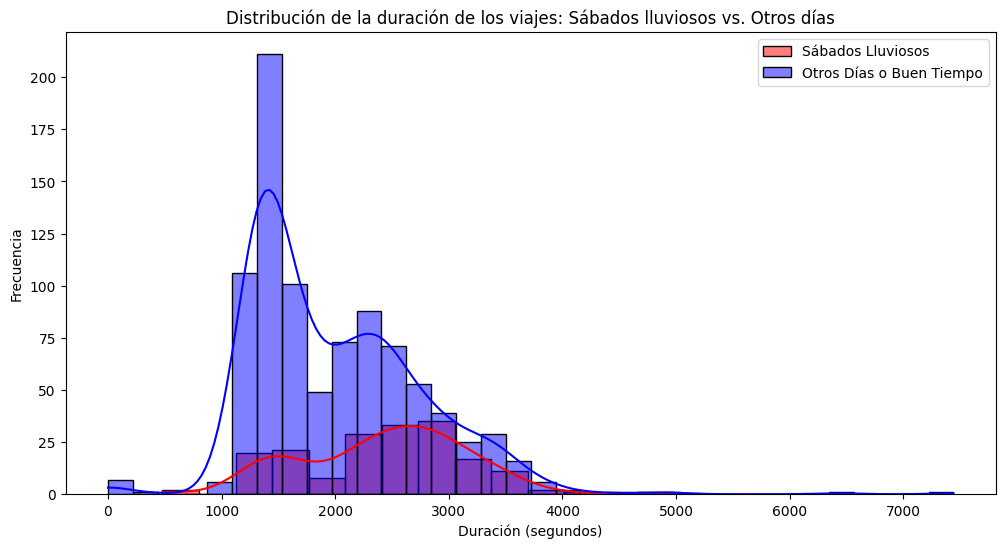

In [11]:
#visualización de la distribución de duración de los viajes en ambos grupos
plt.figure(figsize=(12, 6))

sns.histplot(saturdays_bad_weather['duration_seconds'], color='red', kde=True, label='Sábados Lluviosos')
sns.histplot(other_days_or_good_weather['duration_seconds'], color='blue', kde=True, label='Otros Días o Buen Tiempo')

plt.legend()
plt.title('Distribución de la duración de los viajes: Sábados lluviosos vs. Otros días')
plt.xlabel('Duración (segundos)')
plt.ylabel('Frecuencia')
plt.show()

Antes de realizar la prueba de hipótesis, se generan diagramas de caja para visualizar la distribución de los datos de duración de los viajes los dos grupos: sábados lluviosos y otros días o buen clima. Esto permitió identificar los valores atípicos (puntos fuera de los bigotes del diagrama).


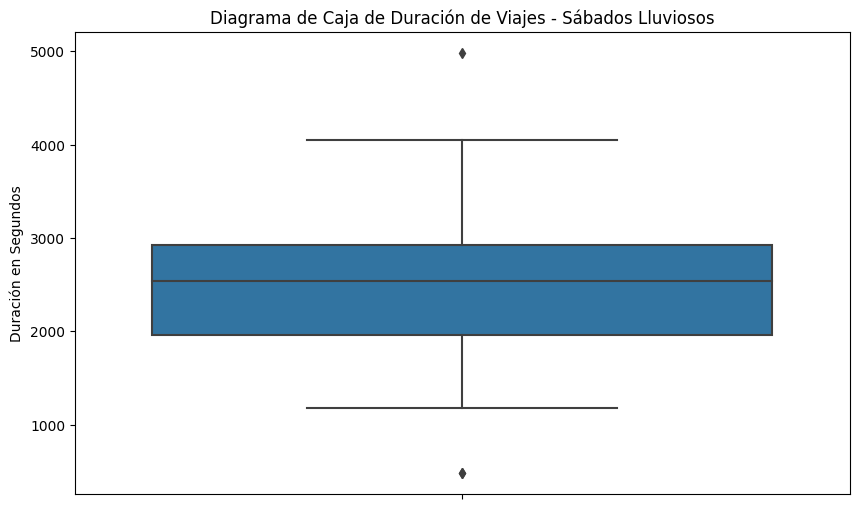

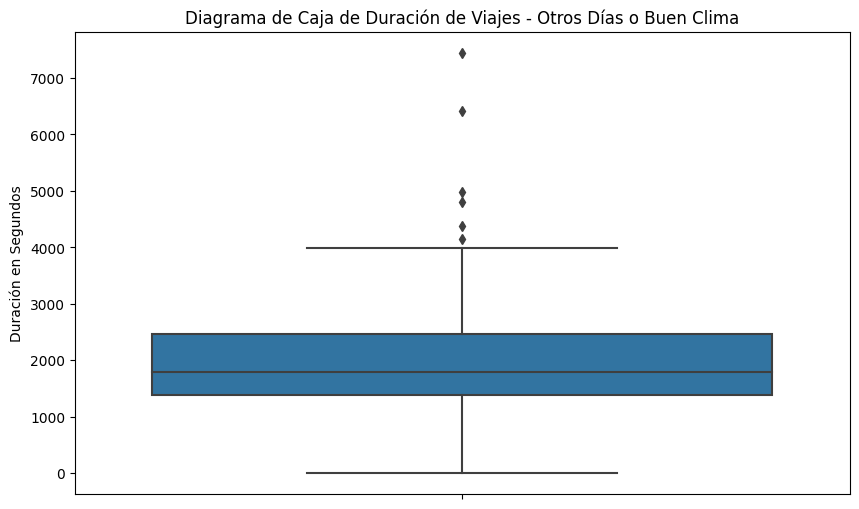

In [14]:
# Crear el diagrama de caja para sábados lluviosos
plt.figure(figsize=(10, 6))
sns.boxplot(y=saturdays_bad_weather['duration_seconds'])
plt.title('Diagrama de Caja de Duración de Viajes - Sábados Lluviosos')
plt.ylabel('Duración en Segundos')
plt.show()
# Crear el diagrama de caja para otros días o días con buen clima
plt.figure(figsize=(10, 6))
sns.boxplot(y=other_days_or_good_weather['duration_seconds'])
plt.title('Diagrama de Caja de Duración de Viajes - Otros Días o Buen Clima')
plt.ylabel('Duración en Segundos')
plt.show()


Tras esto, se calculó el rango intercuartílico para cada grupo y se utilizaron los límites definidos por el IQR para filtrar y eliminar los valores atípicos, lo que permite realizar un análisis más preciso en la prueba de hipótesis.

In [31]:
#Calcular IQR para los sábados lluviosos
Q1_bad = saturdays_bad_weather['duration_seconds'].quantile(0.25)
Q3_bad = saturdays_bad_weather['duration_seconds'].quantile(0.75)
IQR_bad = Q3_bad - Q1_bad
minimo_sabado_lluvia = Q1_bad - 1.5 * IQR_bad
maximo_sabado_lluvia = Q3_bad + 1.5 * IQR_bad

# Calcular IQR para otros días o días con buen clima
Q1_good = other_days_or_good_weather['duration_seconds'].quantile(0.25)
Q3_good = other_days_or_good_weather['duration_seconds'].quantile(0.75)
IQR_good = Q3_good - Q1_good
minimo_otro = Q1_good - 1.5 * IQR_good
maximo_otro = Q3_good + 1.5 * IQR_good



In [32]:
# Filtrar los valores atípicos en los sábados lluviosos
saturdays_bad_weather_clean = saturdays_bad_weather[(saturdays_bad_weather['duration_seconds'] >= minimo_sabado_lluvia) & 
                                     (saturdays_bad_weather['duration_seconds'] <= maximo_sabado_lluvia)]

# Filtrar los valores atípicos en otros días o días con buen clima
other_days_or_good_weather_clean = other_days_or_good_weather[(other_days_or_good_weather['duration_seconds'] >= minimo_otro) & 
                                           (other_days_or_good_weather['duration_seconds'] <= maximo_otro)]

Para probar estadísticamente la hipótesis, se utilizó una prueba t Student para comparar las medias de las duraciones de los dos grupos (sábados con mal tiempo y otros días). Antes de realizar la prueba t, es necesario verificar que las varianzas de los dos grupos sean iguales, para ello, se realizó la prueba de Levene, que evalúa si hay diferencias significativas en la varianza de ambos grupos.

Los resultados de la prueba de Levene mostraron un valor p de 0.356. Dado que este valor es mayor que el nivel de significancia de 0.05, no se puede rechazar la hipótesis nula de que las varianzas de los dos grupos son iguales. 


In [33]:


var_group1 = saturdays_bad_weather_clean['duration_seconds'].var()
var_group2 = other_days_or_good_weather_clean['duration_seconds'].var()
# Mostrar las varianzas
print("Varianza del grupo 1:", var_group1)
print("Varianza del grupo 2:", var_group2)

# Prueba de Levene
levene_stat, levene_pvalue = st.levene(saturdays_bad_weather_clean['duration_seconds'], other_days_or_good_weather_clean['duration_seconds'])

# Resultado de la prueba de Levene
print('valor p levene:', levene_pvalue)



Varianza del grupo 1: 448991.44228299946
Varianza del grupo 2: 493396.68132224516
valor p levene: 0.3563611473946102


A continuación, se realizó la prueba t Student para comparar las medias de los dos grupos. El valor p resultante fue 6.5e-12, lo que es extremadamente pequeño. Como el valor p es menor que el nivel de significancia de 0.05, se rechaza la hipótesis nula de que no hay diferencia significativa en la duración de los viajes entre los dos grupos. Este resultado sugiere que la duración promedio de los viajes desde Loop hasta el Aeropuerto Internacional O'Hare cambia significativamente durante los sábados lluviosos.


In [25]:
#  prueba t Student
t_stat, p_value = st.ttest_ind(saturdays_bad_weather_clean['duration_seconds'], 
                                   other_days_or_good_weather_clean['duration_seconds'], 
                                   equal_var=True)  # Usamos varianzas iguales por el resultado obtenido en Prueba de Levene

# Imprimir los resultados
print(f"T Student: {t_stat}")
print(f"P Value: {p_value}")

# Conclusión
if p_value < 0.05:
    print("Rechazamos la hipótesis nula: la duración promedio de los viajes cambia los sábados lluviosos.")
else:
    print("No rechazamos la hipótesis nula: no hay evidencia suficiente para afirmar que la duración promedio de los viajes cambia los sábados lluviosos.")

T Student: 7.97608221921584
P Value: 3.903810670914357e-15
Rechazamos la hipótesis nula: la duración promedio de los viajes cambia los sábados lluviosos.


Con este análisis se comprobó que el clima tiene un impacto significativo en la duración de los viajes, lo que puede ser útil para la planificación y predicción de tiempos de viaje, especialmente durante eventos climáticos adversos.

### Conclusión del Proyecto

Este proyecto ha permitido obtener valiosos insights sobre los patrones de viajes en taxi en Chicago durante noviembre de 2017, con un enfoque en el impacto del clima y la competitividad entre las empresas de taxis. Los análisis revelaron que las empresas más populares en ese período fueron Flash Cab y Taxi Affiliation Services, con un número significativo de viajes, mientras que los barrios con mayor actividad fueron Loop y River North.

Además, la prueba de hipótesis realizada sobre la duración de los viajes desde Loop hasta el Aeropuerto O'Hare mostró que, efectivamente, los sábados lluviosos tienen un impacto significativo en la duración de los viajes, lo que puede estar relacionado con el aumento del tráfico y las condiciones de manejo más complicadas durante estos días. Estos hallazgos son cruciales para el ajuste de estrategias operativas y de planificación de la empresa, ayudando a anticipar las fluctuaciones en la demanda y la duración de los viajes en función del clima y la localización.

En general, los resultados proporcionan una base sólida para tomar decisiones informadas sobre la estrategia de precios, la asignación de vehículos y la mejora del servicio al cliente en función de las condiciones climáticas y las áreas de alta demanda.
